In [1]:
import torch

X = torch.tensor([
    [3., 5.],
    [5., 1.],
    [10., 2.]
])

y= torch.tensor([
    [75.],
    [82.],
    [93.]
])

X=X/torch.max(X)


y=y/torch.max(y)



In [3]:

# 2, da wir zwei Eingabeneuronen haben

# 1, da wir ein Ausgabeneuron haben (das Testergebnis)

hidden_size=20

w1= torch.normal(mean=0., std=1., size=(2, hidden_size), requires_grad=True)  
w2= torch.normal(mean=0., std=1., size=(hidden_size, 1), requires_grad=True)


def relu(X):
    return torch.max(torch.tensor(0.), X)



In [4]:
def mse_loss(y, y_pred):
    return torch.mean((y - y_pred)**2)

def forward(X):
    z2= X@w1
    a2= relu(z2)
    y_pred= a2@w2
    return y_pred

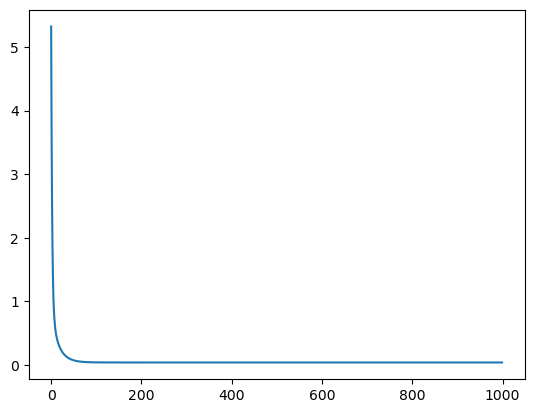

0.038856130093336105


In [10]:
import matplotlib.pyplot as plt


epochs=1000
losses=[]

lr=0.01  # Schrittweite, um die Gewichte zu aktualisieren


w1= torch.normal(mean=0., std=1., size=(2, hidden_size), requires_grad=True)  
w2= torch.normal(mean=0., std=1., size=(hidden_size, 1), requires_grad=True)


for i in range(epochs):
    y_hat= forward(X)           # Vorhersage berechnen
    loss= mse_loss(y, y_hat)    # Fehler
    loss.backward()             # Ableitung durchführen
    losses.append(loss.item())
    with torch.no_grad():
        w1=w1.sub_(w1.grad *lr )    # Gewichte w1 aktualisieren
        w2=w2.sub_(w2.grad *lr )    # Gewichte w2 aktualisieren
        w1.grad.zero_()         # Gradienten zurücksetzen
        w2.grad.zero_()         # Gradienten zurücksetzen
        

plt.plot(losses)
plt.show()
print(losses[-1])


In [11]:
forward(X)

tensor([[0.8064],
        [0.5763],
        [1.1527]], grad_fn=<MmBackward0>)

In [12]:
y

tensor([[0.8065],
        [0.8817],
        [1.0000]])